# Pymaceuticals Inc.
---

### Analysis

- Initial data started with fairly consistent central tendencies across treatments for tumor size and a equal distribtuion of gender in mice was chosen. More analysis would be needed to determine the count of mice starting and ending each study and distribution of gender and weight across drug regmines to further assess test equality.

- In the four drug regmine examined, there is a strong correlation between the tumor volume and weight of the mouse. In one study of a single mouse on Capomulin, the tumor size decresed significantly over time. More data would need to be analyzed to understand if all mice reacted the same and if the size of the mouse is a factor in this outcome.

- For the size of the inital data provided, the data appears consistent, with there being only one outlier in the test (see bar plot for final tumor volume distribution).

In [450]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

#full_data = pd.DataFrame(full_data)

# Display the data table for preview
full_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
len(full_data["Mouse ID"].unique())

249

In [455]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


dup_df = full_data.loc[full_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_df

array(['g989'], dtype=object)

In [461]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_df2 = full_data.loc[full_data['Mouse ID']=='g989']
dup_df2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [462]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = full_data.loc[full_data["Mouse ID"] != "g989"]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [460]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [464]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


# Calculate values
mean_tumor = clean_df.groupby(clean_df["Drug Regimen"]).mean()
median_tumor = clean_df.groupby(clean_df["Drug Regimen"]).median()
var_tumor = clean_df.groupby(clean_df["Drug Regimen"]).var()
std_tumor = clean_df.groupby(clean_df["Drug Regimen"]).std()
sem_tumor = clean_df.groupby(clean_df["Drug Regimen"]).sem()


## Create the new summary dataframe
summary_df = pd.DataFrame({"Mean Tumor": mean_tumor['Tumor Volume (mm3)'],"Median Tumor": median_tumor['Tumor Volume (mm3)'], \
                            "Tumor Volume Variance": var_tumor['Tumor Volume (mm3)'], "Tumor Volume Std. Dev.": std_tumor['Tumor Volume (mm3)'], \
                            "Tumor Volume Std. Err.": sem_tumor['Tumor Volume (mm3)']      })

summary_df




,Mean Tumor,Median Tumor,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [581]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_summary_df = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg \
(["mean","median","var","std","sem"],axis="columns")

agg_summary_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

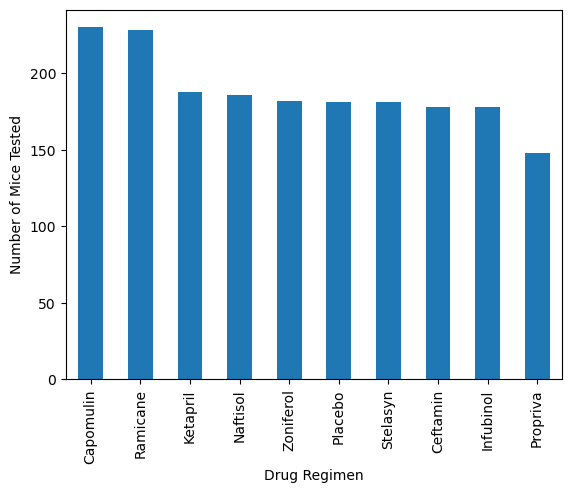

In [470]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Create a new cleaned up dataframe to plot off of - KMc
drugs_totals = clean_df[['Drug Regimen','Mouse ID']]
drugs_totals = drugs_totals.set_index("Drug Regimen")
drugs_totals = drugs_totals.groupby("Drug Regimen").count()
drugs_totals = drugs_totals.sort_values(by=["Mouse ID"], ascending=False)
drugs_totals.plot(kind='bar', legend=False, ylabel="Number of Mice Tested")


plt.show()

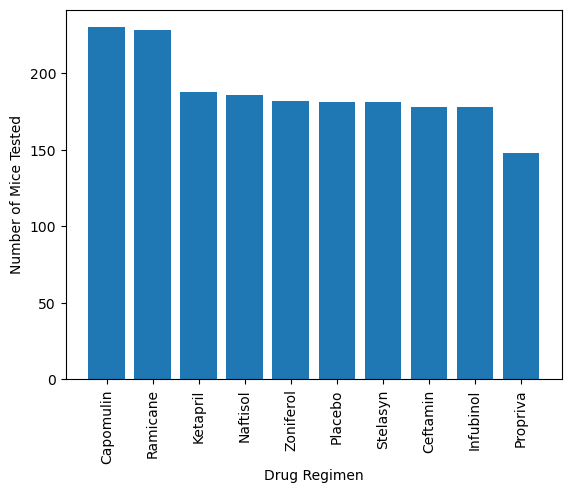

In [473]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


# Plot the data using same data from previous plot

x_axis = np.arange(len(drugs_totals))
ticks = [value for value in x_axis]
plt.bar(x_axis,drugs_totals['Mouse ID'])
plt.xticks(ticks,drugs_totals.index,rotation="vertical")
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.show()

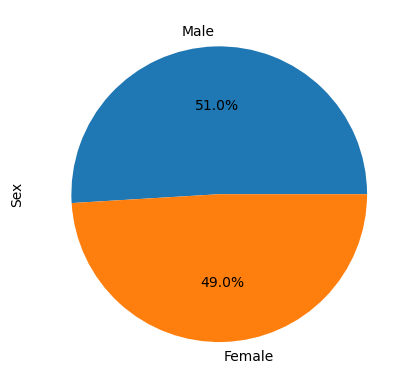

In [478]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Get gender totals from df
count_mouse_gender = mouse_gender['Sex'].count()
count_mouse_gender = count_mouse_gender.sort_values(ascending=False)

# Set up pie chart
gender_chart = count_mouse_gender.plot(kind="pie", autopct='%1.1f%%')



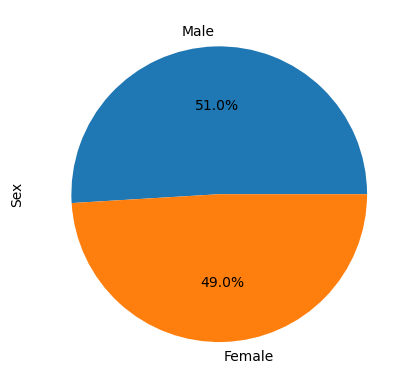

In [479]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = "Male", "Female"
plt.pie(count_mouse_gender, labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [536]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

filter_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.loc[clean_df["Drug Regimen"].isin(filter_list)]
last_timepoint = last_timepoint.groupby(["Drug Regimen","Mouse ID"])
last_timepoint = last_timepoint["Timepoint"].max()
last_timepoint = pd.DataFrame(last_timepoint)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_df = last_timepoint.merge(clean_df, how="left", on=['Mouse ID', 'Timepoint'])

final_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
95,s508,45,30.276232,0,Ramicane,Male,1,17
96,u196,45,40.667713,3,Ramicane,Male,18,25
97,w678,5,43.166373,0,Ramicane,Female,5,24
98,y449,15,44.183451,0,Ramicane,Male,19,24


In [584]:
# Put treatments into a list for for loop (and later for plot labels)

# Pull select tratments from last chart
treatment_list = filter_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_list=[]


# Loop through each treatment

for treatment in treatment_list:

    #loop through drugs
    this_drug = final_df.loc[final_df["Drug Regimen"]==treatment, 'Tumor Volume (mm3)']
    tumor_list.append(this_drug) 

    # calculate bounds and quartiles
    quartiles = this_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
 
    # Determine outliers using upper and lower bounds

    outliers = this_drug[((this_drug < lower_bound)) | ((this_drug > upper_bound))]
    
    print(f"{treatment}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


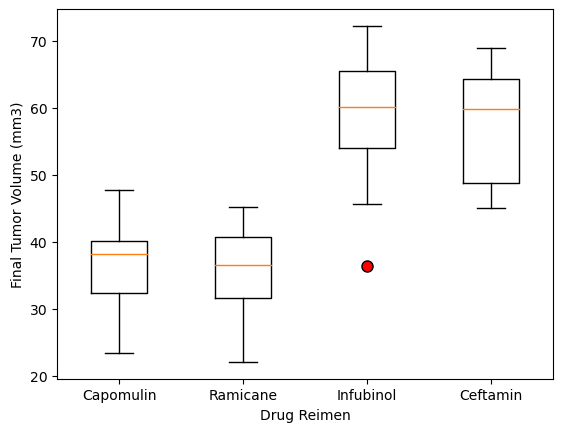

In [587]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

flierprops = dict(marker = 'o', markerfacecolor = 'r', markeredgecolor = 'black', markersize=8)
plt.boxplot(tumor_list, labels=treatment_list, flierprops=flierprops)
plt.xlabel("Drug Reimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

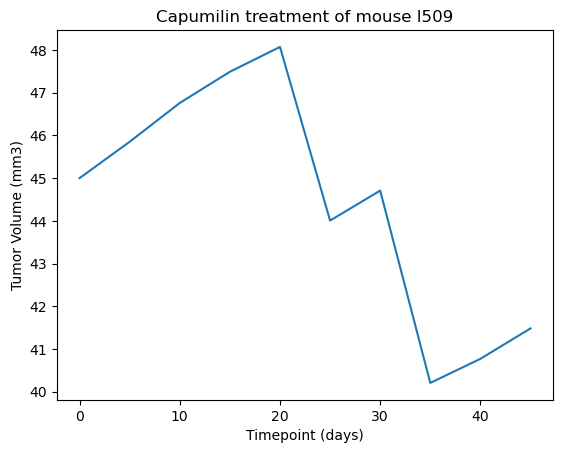

In [563]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

cap_mouse = clean_df.loc[(clean_df['Drug Regimen'] == "Capomulin") & (clean_df['Mouse ID'] == 'l509')]
cap_mouse = pd.DataFrame(cap_mouse)

x_axis = cap_mouse['Timepoint']
y_axis = cap_mouse['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capumilin treatment of mouse l509")

plt.show()

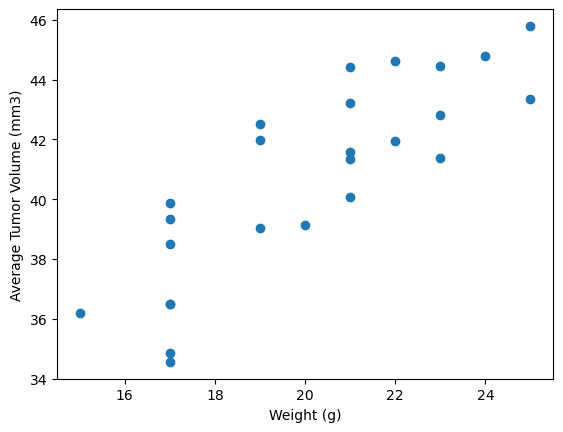

In [564]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


cap_mouse = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
cap_mouse = cap_mouse.groupby(['Mouse ID']).mean()

x_axis = cap_mouse['Weight (g)'] 
y_axis = cap_mouse['Tumor Volume (mm3)']


mygraph = plt.scatter(x_axis, y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show(mygraph)



## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


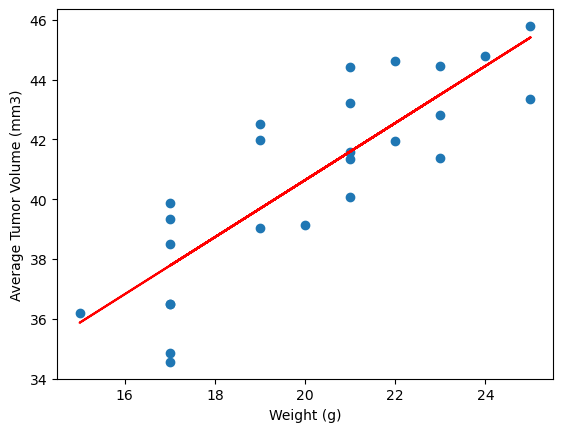

In [582]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation between mouse weight and average tumor volume is \
{round(st.pearsonr(cap_mouse['Weight (g)'],cap_mouse['Tumor Volume (mm3)'])[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept

plt.scatter(x_axis, y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(x_axis,regress_values,"r-")

plt.show()

